In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [4]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations ng

#1

ng1=np.arange(0.5-0.01*0.5 , 0.5+0.01*0.5 + 0.0001 , 0.01*0.5/10)
ng2=np.arange(0.5-0.01*0.5 , 0.5+0.01*0.5 + 0.0001 , 0.01*0.5/10)
print(r"(1%) \epsilon_n = ",0.01*0.5)
epsilon_n=0.01*0.5
print(ng1)


# For calculations phiext

#1

a=np.pi-(np.pi*0.022776)
b=np.pi+(np.pi*0.022776 + 0.0001)
phi_ext1=np.arange(a,b,(0.022776*np.pi)/10)
phi_ext2=np.arange(a,b,(0.022776*np.pi)/10)
print(r"(2.2776%) \epsilon_{\varphi} = ",(0.022776*np.pi))
epsilon_phi=(0.022776*np.pi)
print(phi_ext1)

#2Darrays

PHI,NG=np.meshgrid(phi_ext1,ng1)
print(NG.shape[0])
print(NG.shape[1])
print(NG)
print(PHI)

Energies1_0=np.zeros_like(NG)
Energies1_1=np.zeros_like(NG)

Energies2_0=np.zeros_like(NG)
Energies2_1=np.zeros_like(NG)

(1%) \epsilon_n =  0.005
[0.495  0.4955 0.496  0.4965 0.497  0.4975 0.498  0.4985 0.499  0.4995
 0.5    0.5005 0.501  0.5015 0.502  0.5025 0.503  0.5035 0.504  0.5045
 0.505 ]
(2.2776%) \epsilon_{\varphi} =  0.07155291427816113
[3.07003974 3.07719503 3.08435032 3.09150561 3.09866091 3.1058162
 3.11297149 3.12012678 3.12728207 3.13443736 3.14159265 3.14874795
 3.15590324 3.16305853 3.17021382 3.17736911 3.1845244  3.19167969
 3.19883499 3.20599028 3.21314557]
21
21
[[0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495
  0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495  0.495
  0.495 ]
 [0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955
  0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955 0.4955
  0.4955]
 [0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496
  0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496  0.496
  0.496 ]
 [0.4965 0.4965 0.4965 0.4965 0.4965 0.4965 0.4965 0.4965 0.4965 0.4965
 

In [5]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("i=",i)
        print("j=",j)
        print("Step for ng = ",ng1[i],", phi_ext= ",phi_ext1[j])
        H1=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng1[i],phi_ext1[j],alpha)
        print("Hamiltonian built, len(H)=",len(H1)**2)
        #vals,vects=np.linalg.eigh(H)
        vals, _ = eigsh(H1, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals[0],vals[1])
        print("Eigenvalues calculated")
        Energies1_0[i][j]+=vals[0]
        print("Energies1_0[",i,"][",j,"] = ",Energies1_0[i][j])
        Energies1_1[i][j]+=vals[1]
        print("Energies1_1[",i,"][",j,"] = ",Energies1_1[i][j])

i= 0
j= 0
Step for ng =  0.495 , phi_ext=  3.070039739311632
Hamiltonian built, len(H)= 4372281
1.7458978359656476 1.7983164218881036
Eigenvalues calculated
Energies1_0[ 0 ][ 0 ] =  1.7458978359656476
Energies1_1[ 0 ][ 0 ] =  1.7983164218881036
i= 0
j= 1
Step for ng =  0.495 , phi_ext=  3.077195030739448
Hamiltonian built, len(H)= 4372281
1.747364309599936 1.7968010876772613
Eigenvalues calculated
Energies1_0[ 0 ][ 1 ] =  1.747364309599936
Energies1_1[ 0 ][ 1 ] =  1.7968010876772613
i= 0
j= 2
Step for ng =  0.495 , phi_ext=  3.084350322167264
Hamiltonian built, len(H)= 4372281
1.7487572738502486 1.7953644019633808
Eigenvalues calculated
Energies1_0[ 0 ][ 2 ] =  1.7487572738502486
Energies1_1[ 0 ][ 2 ] =  1.7953644019633808
i= 0
j= 3
Step for ng =  0.495 , phi_ext=  3.0915056135950802
Hamiltonian built, len(H)= 4372281
1.7500619810619502 1.7940211137695896
Eigenvalues calculated
Energies1_0[ 0 ][ 3 ] =  1.7500619810619502
Energies1_1[ 0 ][ 3 ] =  1.7940211137695896
i= 0
j= 4
Step for ng

In [6]:
print(Energies1_0)

[[1.74589784 1.74736431 1.74875727 1.75006198 1.751261   1.75233421
  1.75325922 1.75401241 1.75457083 1.75491486 1.75503113 1.75491486
  1.75457083 1.75401241 1.75325922 1.75233421 1.751261   1.75006198
  1.74875727 1.74736431 1.74589784]
 [1.74695172 1.74848522 1.74995034 1.75133173 1.75261064 1.75376464
  1.7547677  1.75559127 1.75620644 1.75658761 1.75671683 1.75658761
  1.75620644 1.75559127 1.7547677  1.75376464 1.75261064 1.75133173
  1.74995034 1.74848522 1.74695172]
 [1.74793431 1.74953615 1.75107618 1.75253885 1.75390448 1.75514846
  1.75624095 1.75714743 1.7578312  1.75825815 1.7584035  1.75825815
  1.7578312  1.75714743 1.75624095 1.75514846 1.75390448 1.75253885
  1.75107618 1.74953615 1.74793431]
 [1.74883636 1.75050663 1.75212313 1.7536707  1.75512934 1.75647287
  1.7576677  1.75867253 1.75944046 1.75992513 1.76009116 1.75992513
  1.75944046 1.75867253 1.7576677  1.75647287 1.75512934 1.7536707
  1.75212313 1.75050663 1.74883636]
 [1.74964793 1.75138511 1.75307788 1.7547

In [7]:
for i in range(NG.shape[0]):
    for j in range(NG.shape[1]):
        print("Step for ng = ",ng2[i],", phi_ext= ",phi_ext2[j])
        H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng2[i],phi_ext2[j],alpha2)
        print("Hamiltonian built, len(H)=",len(H2)**2)
        #vals,vects=np.linalg.eigh(H)
        vals2, _ = eigsh(H2, k=2, which='SA')
        #vals,_=np.linalg.eigh(H)
        print(vals2[0],vals2[1])
        print("Eigenvalues calculated")
        Energies2_0[i][j]+=vals2[0]
        print("Energies2_0[",i,"][",j,"] = ",Energies2_0[i][j])
        Energies2_1[i][j]+=vals2[1]
        print("Energies2_1[",i,"][",j,"] = ",Energies2_1[i][j])

Step for ng =  0.495 , phi_ext=  3.070039739311632
Hamiltonian built, len(H)= 4372281
0.27376352754910294 0.27652260060295497
Eigenvalues calculated
Energies2_0[ 0 ][ 0 ] =  0.27376352754910294
Energies2_1[ 0 ][ 0 ] =  0.27652260060295497
Step for ng =  0.495 , phi_ext=  3.077195030739448
Hamiltonian built, len(H)= 4372281
0.2738300736671009 0.2764548613829938
Eigenvalues calculated
Energies2_0[ 0 ][ 1 ] =  0.2738300736671009
Energies2_1[ 0 ][ 1 ] =  0.2764548613829938
Step for ng =  0.495 , phi_ext=  3.084350322167264
Hamiltonian built, len(H)= 4372281
0.27389267914222154 0.2763911882434291
Eigenvalues calculated
Energies2_0[ 0 ][ 2 ] =  0.27389267914222154
Energies2_1[ 0 ][ 2 ] =  0.2763911882434291
Step for ng =  0.495 , phi_ext=  3.0915056135950802
Hamiltonian built, len(H)= 4372281
0.273950703790029 0.2763322214193538
Eigenvalues calculated
Energies2_0[ 0 ][ 3 ] =  0.273950703790029
Energies2_1[ 0 ][ 3 ] =  0.2763322214193538
Step for ng =  0.495 , phi_ext=  3.0986609050228964
Ham

In [8]:
print(Energies2_0)

[[0.27376353 0.27383007 0.27389268 0.2739507  0.27400343 0.27405007
  0.27408979 0.27412177 0.27414526 0.27415962 0.27416446 0.27415962
  0.27414526 0.27412177 0.27408979 0.27405007 0.27400343 0.2739507
  0.27389268 0.27383007 0.27376353]
 [0.27382978 0.27389995 0.27396636 0.2740283  0.27408496 0.27413545
  0.27417876 0.27421387 0.27423979 0.27425572 0.27426109 0.27425572
  0.27423979 0.27421387 0.27417876 0.27413545 0.27408496 0.2740283
  0.27396636 0.27389995 0.27382978]
 [0.27389212 0.27396609 0.27403654 0.27410275 0.27416381 0.27421868
  0.27426618 0.27430502 0.27433392 0.27435178 0.27435782 0.27435178
  0.27433392 0.27430502 0.27426618 0.27421868 0.27416381 0.27410275
  0.27403654 0.27396609 0.27389212]
 [0.2739499  0.27402778 0.2741025  0.2741733  0.27423922 0.27429909
  0.27435149 0.27439484 0.27442744 0.27444774 0.27445465 0.27444774
  0.27442744 0.27439484 0.27435149 0.27429909 0.27423922 0.2741733
  0.2741025  0.27402778 0.2739499 ]
 [0.2740024  0.27408423 0.27416334 0.274239

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (1)

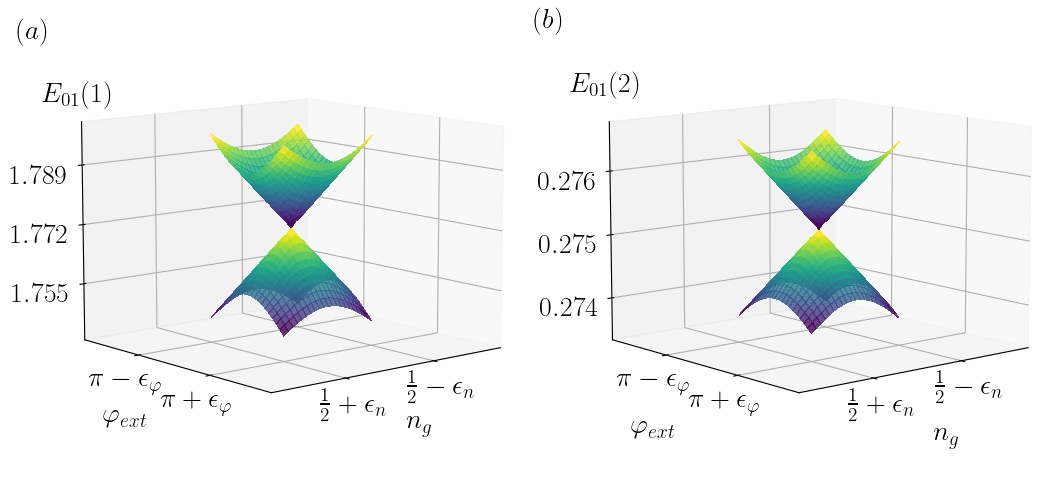

In [9]:
# Create the figure and subplots
fig = plt.figure(figsize=(13, 6))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(NG,PHI, Energies1_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surf2 = ax1.plot_surface(NG,PHI, Energies1_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax1.set_xlabel('$n_g$')
#ax1.set_ylabel(r'$\varphi_{ext}$')
#ax1.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax1.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax1.set_zlim(1.74,1.8)
ax1.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,1.808,r'$E_{01} (1)$', fontsize=20)
ax1.text(0.5,np.pi+3*epsilon_phi,1.7233,r'$n_g$', fontsize=20)
ax1.text(0.5+4.1*epsilon_n,np.pi,1.7265,r'$\varphi_{ext}$', fontsize=20)
ax1.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax1.set_zticks([1.755,1.772,1.789],['$1.755$','$1.772$','$1.789$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=2.0)
ax1.tick_params(axis='z', pad=10.0)
ax1.text(0.5+4*epsilon_n,np.pi-2.5*epsilon_phi,1.826,r'$(a)$', fontsize=20)
#ax1.scatter([0.5],[np.pi+0.17],[1.730], color='red')
ax1.view_init(10, 50)

# Plot 1: 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
surff1 = ax2.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surff2 = ax2.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax2.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax2.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax2.set_zlim(0.2734,0.2767)
ax2.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,0.2773,r'$E_{01} (2)$', fontsize=20)
ax2.text(0.5,np.pi+3*epsilon_phi,0.2723,r'$n_g$', fontsize=20)
ax2.text(0.5+4.1*epsilon_n,np.pi,0.2725,r'$\varphi_{ext}$', fontsize=20)
ax2.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax2.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax2.set_zticks([0.274,0.275,0.276],['$0.274$','$0.275$','$0.276$'])
ax2.tick_params(axis='x', pad=-2.0)
ax2.tick_params(axis='y', pad=2.0)
ax2.tick_params(axis='z', pad=10.0)
ax2.text(0.5+4.2*epsilon_n,np.pi-2.5*epsilon_phi,0.2783,r'$(b)$', fontsize=20)
ax2.view_init(10, 50)

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.1)

# Show the figure
#plt.savefig('E01_1&2_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

GROUND STATE & 1ST EXCITED STATE JOINT 3D PLOT AND SEPARATED COLORMAPS (2)

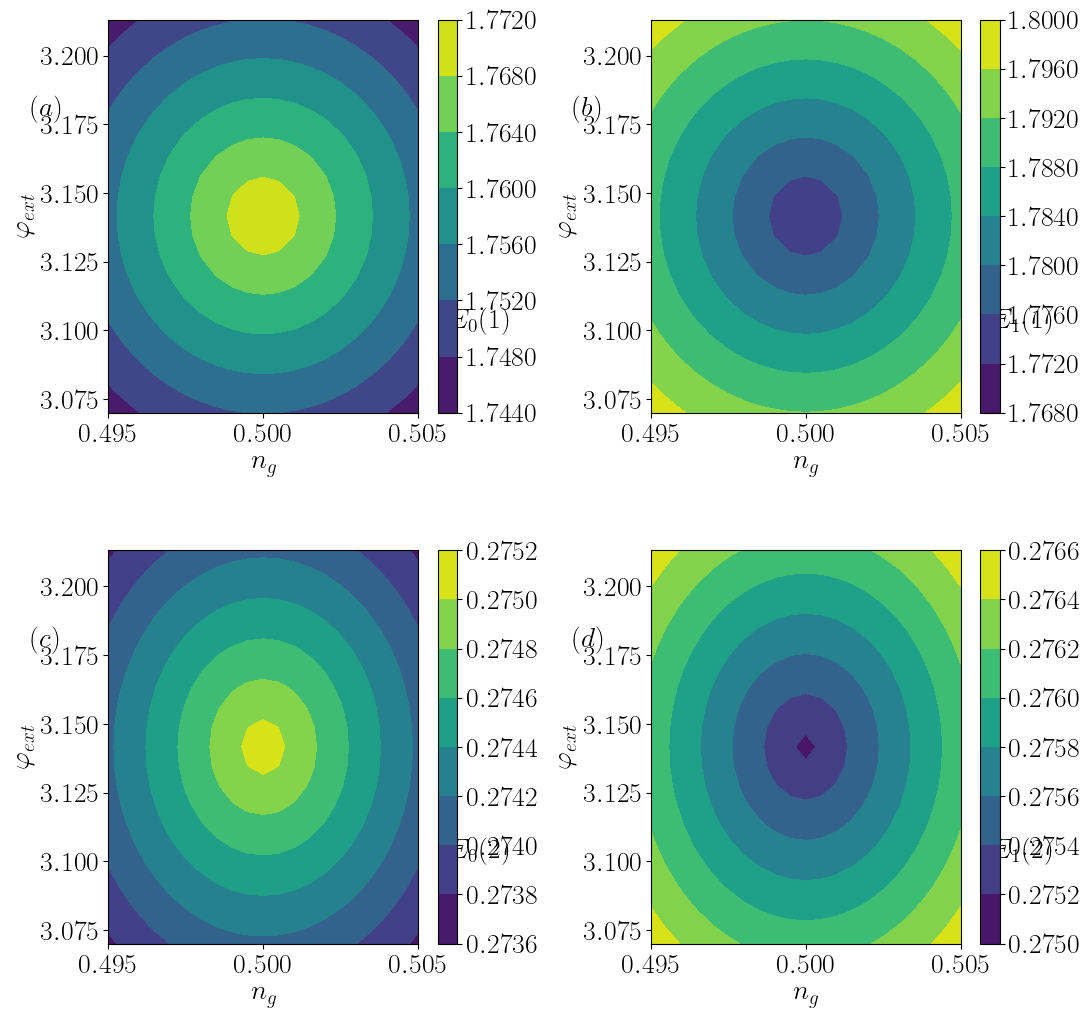

In [10]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 2: First contour plot
ax21 = fig.add_subplot(221)
contour1 = ax21.contourf(NG,PHI, Energies1_0, cmap="viridis")
plt.axis('tight')
ax21.set_xlabel(r'$n_g$')
ax21.set_ylabel(r'$\varphi_{ext}$')
ax21.text(0.506,3.101,r'$E_0 (1)$', fontsize=20)
ax21.text(0.4925,3.178,r'$(a)$', fontsize=20)
colorbar1 = plt.colorbar(contour1, ax=ax21)
#colorbar1.set_label('$E_0 (1)$')
colorbar1.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Plot 3: Second contour plot
ax31 = fig.add_subplot(222)
contour2 = ax31.contourf(NG, PHI, Energies1_1, cmap="viridis")
plt.axis('tight')
ax31.set_xlabel('$n_g$')
ax31.set_ylabel(r'$\varphi_{ext}$')
ax31.text(0.506,3.101,r'$E_1 (1)$', fontsize=20)
ax31.text(0.4925,3.178,r'$(b)$', fontsize=20)
colorbar2 = plt.colorbar(contour2, ax=ax31)
#colorbar2.set_label('$E_1 (1)$')
colorbar2.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Plot 2: First contour plot
ax22 = fig.add_subplot(223)
contour3 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_g$')
ax22.set_ylabel(r'$\varphi_{ext}$')
ax22.text(0.506,3.101,r'$E_0 (2)$', fontsize=20)
ax22.text(0.4925,3.178,r'$(c)$', fontsize=20)
colorbar3 = plt.colorbar(contour3, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar3.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax32 = fig.add_subplot(224)
contour4 = ax32.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax32.set_xlabel('$n_g$')
ax32.set_ylabel(r'$\varphi_{ext}$')
ax32.text(0.506,3.101,r'$E_1 (2)$', fontsize=20)
ax32.text(0.4925,3.178,r'$(d)$', fontsize=20)
colorbar4 = plt.colorbar(contour4, ax=ax32)
#colorbar2.set_label('$E_1 (2)$')
colorbar4.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4,hspace=0.35)

# Show the figure
#plt.savefig('E01_1&2_CMAP_DEF_PRUEBA1.png',dpi=300,bbox_inches='tight')
plt.show()

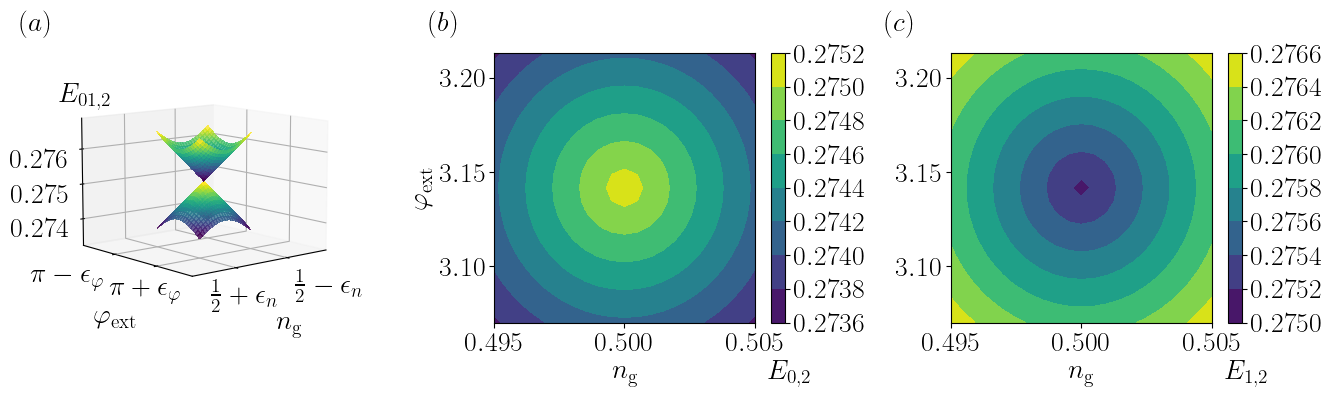

In [69]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 3.5))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surff1 = ax1.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
surff2 = ax1.plot_surface(NG,PHI, Energies2_1, cmap="viridis", linewidth=0, antialiased=False, alpha=0.8)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.5-2.5*epsilon_n,0.5+2.5*epsilon_n)
ax1.set_ylim(np.pi-2.5*epsilon_phi,np.pi+2.5*epsilon_phi)
ax1.set_zlim(0.2733,0.2768)
ax1.text(0.5+3.5*epsilon_n,np.pi-2.5*epsilon_phi,0.2774,r'$E_{01,2}$', fontsize=20)
ax1.text(0.499,np.pi+3*epsilon_phi,0.2714,r'$n_{\rm g}$', fontsize=20)
ax1.text(0.5+4.1*epsilon_n,np.pi,0.2717,r'$\varphi_{\rm ext}$', fontsize=20)
ax1.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.get_xticklabels()[0].set_ha('left')
ax1.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax1.get_yticklabels()[0].set_ha('right')
ax1.set_zticks([0.274,0.275,0.276],['$0.274$','$0.275$','$0.276$'])
ax1.tick_params(axis='x', pad=-1.0)
ax1.tick_params(axis='y', pad=0.0)
ax1.tick_params(axis='z', pad=10.0)
ax1.text(0.5+4.8*epsilon_n,np.pi-2.5*epsilon_phi,0.2794,r'$(a)$', fontsize=20)
ax1.view_init(10, 50)

# Plot 2: First contour plot
ax22 = fig.add_subplot(132)
contour3 = ax22.contourf(NG, PHI, Energies2_0, cmap="viridis")
plt.axis('tight')
ax22.set_xlabel(r'$n_{\rm g}$')
ax22.set_ylabel(r'$\varphi_{\rm ext}$')
ax22.text(0.5055,3.04,r'$E_{0,2}$', fontsize=20)
ax22.text(0.4925,3.225,r'$(b)$', fontsize=20)
colorbar3 = plt.colorbar(contour3, ax=ax22)
#colorbar1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))  # Set 2 decimal places
colorbar3.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

#colorbar1.set_label('$E_0 (2)$')

# Plot 3: Second contour plot
ax32 = fig.add_subplot(133)
contour4 = ax32.contourf(NG, PHI, Energies2_1, cmap="viridis")
plt.axis('tight')
ax32.set_xlabel(r'$n_{\rm g}$')
#ax32.set_ylabel(r'$\varphi_{\rm ext}$')
ax32.text(0.5055,3.04,r'$E_{1,2}$', fontsize=20)
ax32.text(0.4925,3.225,r'$(c)$', fontsize=20)
colorbar4 = plt.colorbar(contour4, ax=ax32)
#colorbar2.set_label('$E_1 (2)$')
colorbar4.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.4f$'))

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.4)

# Show the figure
#plt.savefig('E01_2_DEF_1_reduced.png',dpi=300,bbox_inches='tight')
plt.show()

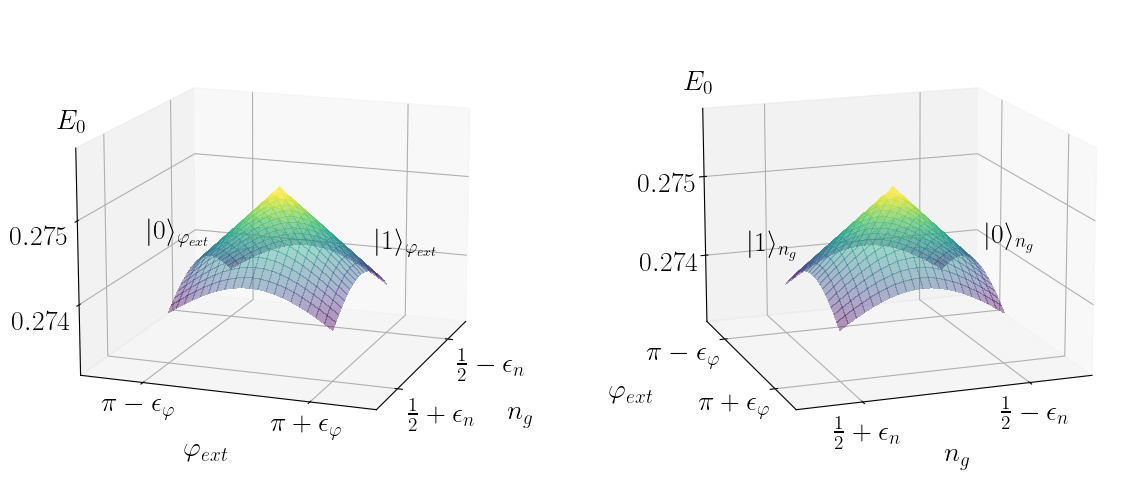

In [17]:
# Create the figure and subplots
fig = plt.figure(figsize=(14, 7))

# Plot 1: 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surff1 = ax1.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.4)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax1.set_xlim(0.5-1.7*epsilon_n,0.5+1.7*epsilon_n)
ax1.set_ylim(np.pi-1.7*epsilon_phi,np.pi+1.7*epsilon_phi)
ax1.set_zlim(0.2732,0.2758)
ax1.text(0.5+0.7*epsilon_n,np.pi-2.5*epsilon_phi,0.2758,r'$E_0$', fontsize=20)
ax1.text(0.506,np.pi+3.1*epsilon_phi,0.273,r'$n_g$', fontsize=20)
ax1.text(0.5+3*epsilon_n,np.pi,0.2728,r'$\varphi_{ext}$', fontsize=20)
ax1.text(0.5-1.5*epsilon_n,np.pi-2.3*epsilon_phi,0.2739,r'$|0\rangle_{\varphi_{ext}}$', fontsize=20)
ax1.text(0.5+0.7*epsilon_n,np.pi+1.4*epsilon_phi,0.2747,r'$|1\rangle_{\varphi_{ext}}$', fontsize=20)
ax1.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
ax1.get_xticklabels()[0].set_ha('left')
ax1.get_xticklabels()[1].set_ha('left')
ax1.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
#ax1.get_yticklabels()[0].set_ha('right')
ax1.set_zticks([0.274,0.275],['$0.274$','$0.275$'])
ax1.tick_params(axis='x', pad=-2.0)
ax1.tick_params(axis='y', pad=-1.0)
ax1.tick_params(axis='z', pad=8.0)
#ax1.scatter(, ,0.274, color='red', s=100)
ax1.text(0.5+4.4*epsilon_n,np.pi-2.5*epsilon_phi,0.28045,r'$(a)$', fontsize=20)
ax1.view_init(15, 20)

# Plot 1: 3D surface plot
ax2 = fig.add_subplot(122, projection='3d')
surff2 = ax2.plot_surface(NG,PHI,Energies2_0, cmap="viridis", linewidth=0, antialiased=False, alpha=0.4)
#ax2.set_xlabel('$n_g$')
#ax2.set_ylabel(r'$\varphi_{ext}$')
#ax2.set_zlabel('$E_{01} (1)$')
ax2.set_xlim(0.5-1.7*epsilon_n,0.5+1.7*epsilon_n)
ax2.set_ylim(np.pi-1.7*epsilon_phi,np.pi+1.7*epsilon_phi)
ax2.set_zlim(0.2732,0.2758)
ax2.text(0.5+1.8*epsilon_n,np.pi-2.5*epsilon_phi,0.27595,r'$E_0$', fontsize=20)
ax2.text(0.5035,np.pi+3.5*epsilon_phi,0.273,r'$n_g$', fontsize=20)
ax2.text(0.5+3.7*epsilon_n,np.pi+0.08,0.2733,r'$\varphi_{ext}$', fontsize=20)
ax2.text(0.5+1*epsilon_n,np.pi-2.5*epsilon_phi,0.2738,r'$|1\rangle_{n_g}$', fontsize=20)
ax2.text(0.5-2.8*epsilon_n,np.pi-4*epsilon_phi,0.27316,r'$|0\rangle_{n_g}$', fontsize=20)
ax2.set_xticks([0.5-epsilon_n,0.5+epsilon_n],[r'$\frac{1}{2}-\epsilon_n$',r'$\frac{1}{2}+\epsilon_n$'])
#ax2.get_xticklabels()[0].set_ha('left')
ax2.set_yticks([np.pi-epsilon_phi,np.pi+epsilon_phi],[r'$\pi - \epsilon_{\varphi}$',r'$\pi + \epsilon_{\varphi}$'])
ax2.get_yticklabels()[0].set_ha('right')
ax2.get_yticklabels()[1].set_ha('right')
ax2.set_zticks([0.274,0.275],['$0.274$','$0.275$'])
ax2.tick_params(axis='x', pad=-1.0)
ax2.tick_params(axis='y', pad=-5.0)
ax2.tick_params(axis='z', pad=10.0)
#ax1.scatter(, ,0.274, color='red', s=100)
ax2.text(0.5+4.4*epsilon_n,np.pi-2.5*epsilon_phi,0.28045,r'$(a)$', fontsize=20)
ax2.view_init(15, 70)

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.3)

# Show the figure
#plt.savefig('Surface.png',dpi=300,bbox_inches='tight')
plt.show()